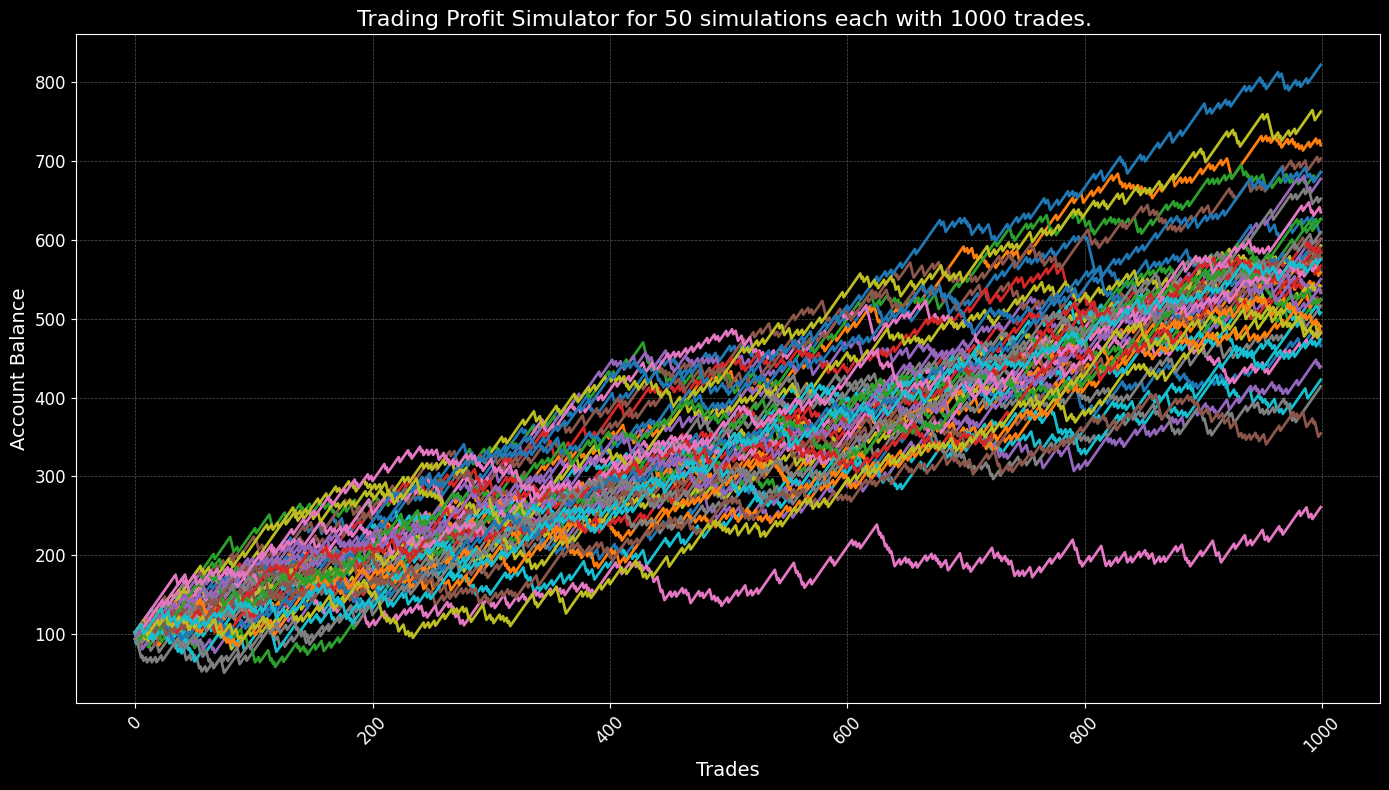

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import random

class Trading_Profits_Simulator:
    def __init__(self, account_balance, num_simulations, num_trades_per_simulation, win_accuracy, avg_win, avg_loss,avg_spread, commission_per_lot, avg_lot_size):
        self.account_balance, self.num_simulations , self.num_trades_per_simulation, self.win_accuracy, self.avg_win, self.avg_loss, self.avg_spread, self.commission_per_lot, self.avg_lot_size = account_balance, num_simulations, num_trades_per_simulation, win_accuracy, avg_win, avg_loss,avg_spread, commission_per_lot, avg_lot_size
        self.new_balance = account_balance
        simulation_series = []
        for i in range(num_simulations):
            simulation_series.append(self.simulate(account_balance))
        self.plot_chart(simulation_series)

    def simulate(self, balance):
        new_balance = balance
        data_list = []
        for i in range(self.num_trades_per_simulation):
            outcomes = ["Win", "Lose"]
            probabilities = [self.win_accuracy, 1-self.win_accuracy]
            result = random.choices(outcomes, probabilities)[0]
            if result=='Win':
                profit = self.avg_win
            elif result=='Lose':
                profit = self.avg_loss
            profit = profit - (self.avg_spread + (self.commission_per_lot * self.avg_lot_size))
            new_balance += profit
            data_list.append(new_balance)
        return pd.Series(data_list)

    def plot_chart(self, simulation_series):
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(14, 8))
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        for i, simulation in enumerate(simulation_series):
            color = colors[i % len(colors)]  # Cycle through the color list
            ax.plot(simulation, linestyle='-', color=color, linewidth=2, label=f'Simulation {i}' if i < 10 else "")


        ax.set_title(f"Trading Profit Simulator for {self.num_simulations} simulations each with {self.num_trades_per_simulation} trades. ", fontsize=16, color='white')
        ax.set_xlabel('Trades', fontsize=14, color='white')
        ax.set_ylabel('Account Balance', fontsize=14, color='white')
        ax.tick_params(axis='both', which='major', labelsize=12, colors='white')
        plt.xticks(rotation=45)
        ax.grid(True, color='#555555', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()


simulator = Trading_Profits_Simulator(account_balance=100, num_simulations=50, num_trades_per_simulation=1000, win_accuracy=0.8, avg_win=2.5, avg_loss=-6,avg_spread=0.15, commission_per_lot=20, avg_lot_size=0.01)